In [20]:
# imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
url = 'https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Census%20Income/adult.data.csv'
response = requests.get(url)
data = response.text

with open('adult.data.csv', 'w') as f:
    f.write(data)

df_original = pd.read_csv('adult.data.csv', header=None)

# cols

df_original.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df= df_original.copy()
print('Cantidad de registros: ', df.shape[0])

Cantidad de registros:  32561


## Introducción

**Motivacion**: El estudio alrededor de caracteristicas socioeconomicas y demograficas en la actualidad donde existen gran variedad de culturas y la relacion de esta al impacto en la sociedad.

**Exploracion de datos** \\
Partiendo por datos generales del data frame

Explicación de columnas...

## Análisis y gráficos

En primer lugar realizarémos una revisión general del dataframe, identificació de registros duplicados y vacíos:

In [22]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
90%,58.000000,3.290540e+05,13.000000,0.000000,0.000000,55.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
99%,74.000000,5.100720e+05,16.000000,15024.000000,1980.000000,80.000000


De esta primera exploración (solo columnas numericas) se identifica la existencia de outliers, estos son evidentes en las columnas de 'capital_gain', 'capital_loss' y 'hours_per_week'. Esto es solo una vista general por lo que se deben revisar las columnas por separado para poder eliminar aquellos regitros que correspondan a outliers. 

Además se observa una gran cantidad de ceros en las columnas 'capital_gain' y 'capital_loss' esto a priori podría ser problemático, sin embargo se debe estudiar con más detalle y la correlación con variable a predecir.

[Benja]

### Tratamiento de nulos

In [23]:
nan_values = df.isna().sum()
print('Cantidad de valores nulos por columna: ')
print(nan_values)

Cantidad de valores nulos por columna: 
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Se observa que no existen valores nulos en el dataset por lo tanto, no es necesario imputar o eliminar nulos. 

[Benja]

### Tratamiento de Duplicados

Se eliminan los registros duplicados y se les asigna un id único a los registros

In [24]:
print('Cantidad de registros pre eliminación de duplicados: ', df.shape[0])

# contamos registros duplicados
duplicates = df.duplicated().sum()
print('Cantidad de registros duplicados: ', duplicates)

# eliminamos registros duplicados
df.drop_duplicates(inplace=True)

# agregamos columna id
df.insert(loc=0, column='id', value=range(0,len(df)))

print('Cantidad de registros post eliminación de duplicados: ', df.shape[0])

Cantidad de registros pre eliminación de duplicados:  32561
Cantidad de registros duplicados:  24
Cantidad de registros post eliminación de duplicados:  32537


### Agregación de columnas

In [25]:
# sobre y sub 40hrs/semana
df['hours_per_week_vs_mean'] = df['hours_per_week'].apply(lambda x: '>40' if x > 40 else '<=40')

In [26]:
df['american'] = df['native_country'].apply(lambda x: 1 if x == ' United-States' else 0)

### Gráficos univariados y manejo de outliers

Text(0, 0.5, 'Frequency')

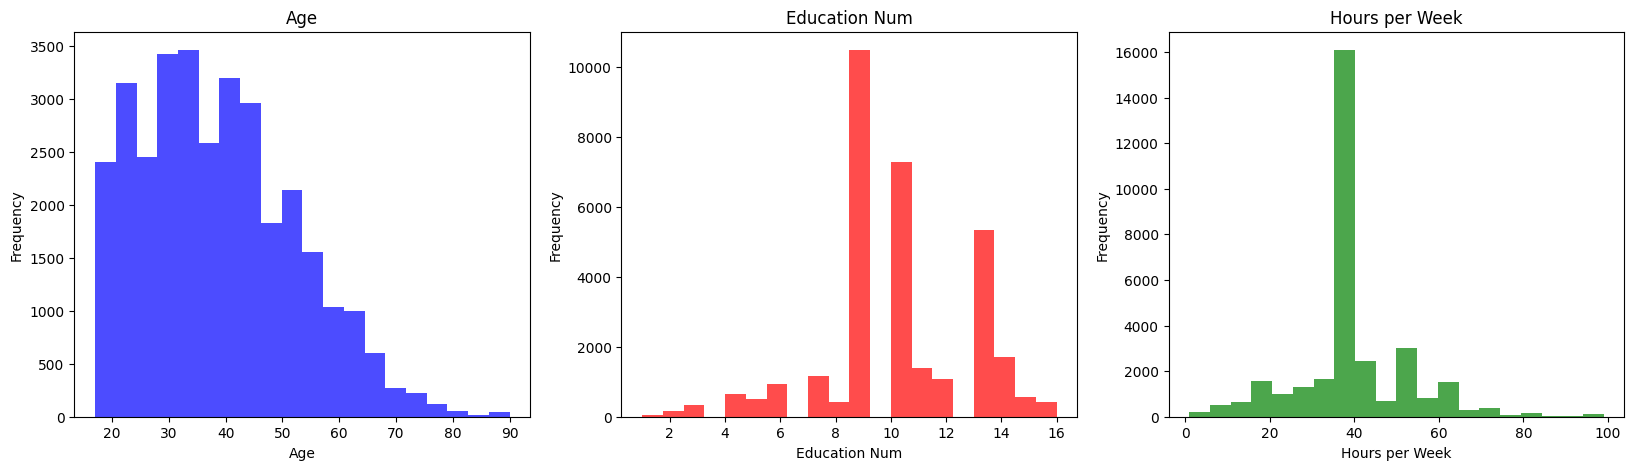

In [27]:
# hisotgramas de age, education_num y hours_per_week

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='blue', alpha=0.7)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['education_num'], bins=20, color='red', alpha=0.7)
plt.title('Education Num')
plt.xlabel('Education Num')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['hours_per_week'], bins=20, color='green', alpha=0.7)
plt.title('Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

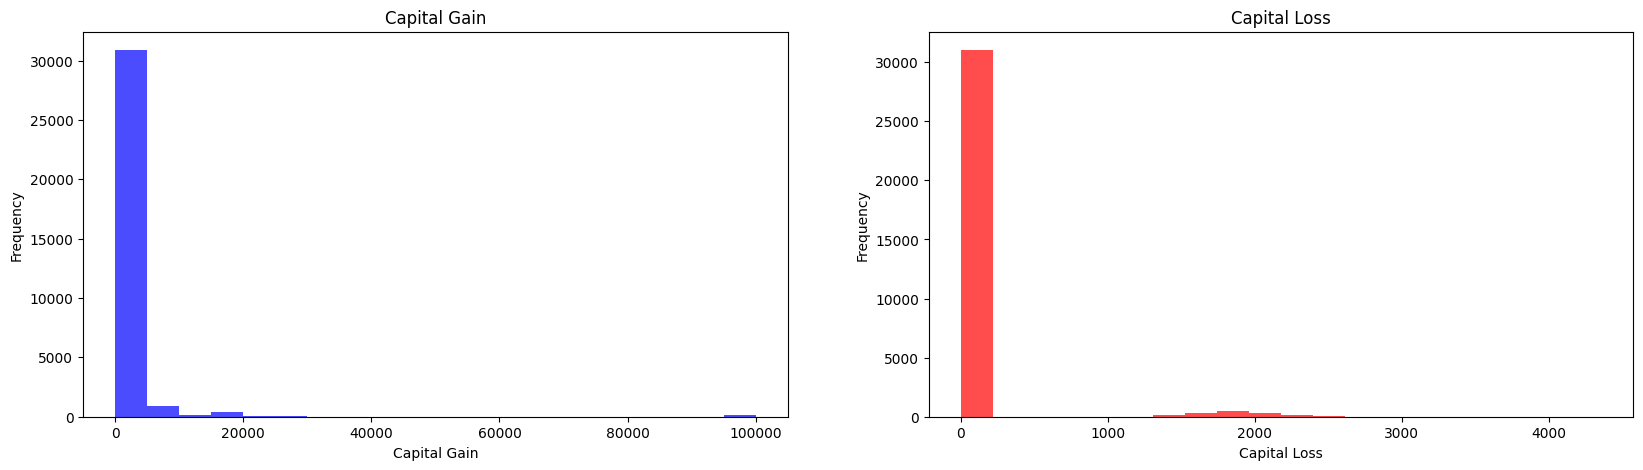

In [28]:
# histogramas capital_gain y capital_loss
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(df['capital_gain'], bins=20, color='blue', alpha=0.7)
plt.title('Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['capital_loss'], bins=20, color='red', alpha=0.7)
plt.title('Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')


### Graficos multivariados

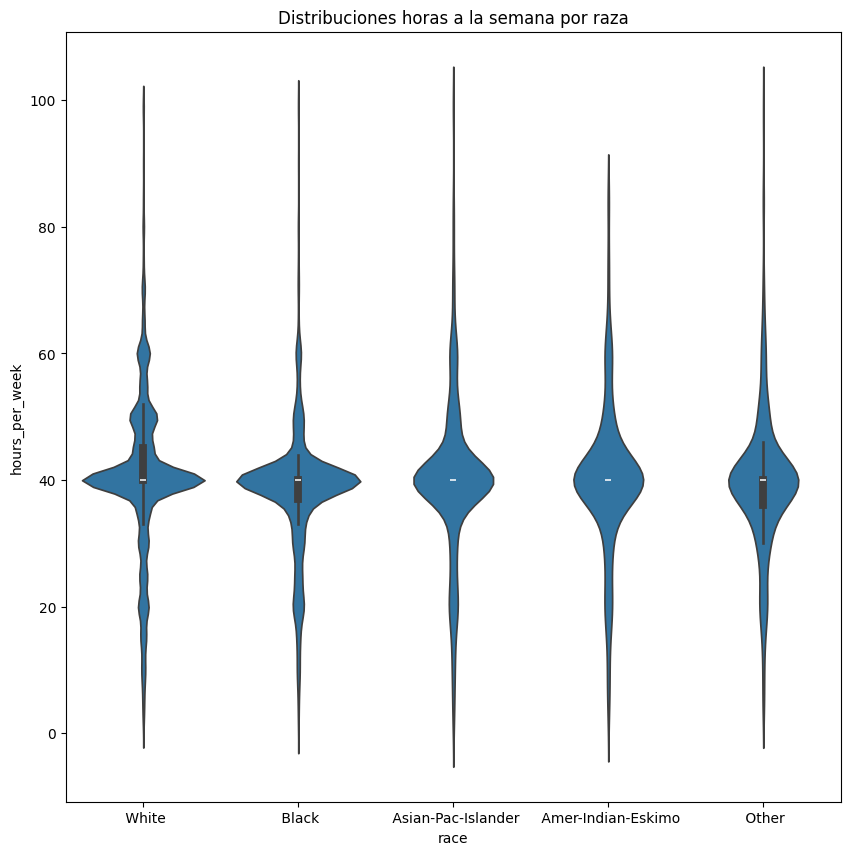

In [29]:
# hours vs race

plt.figure(figsize=(10, 10))
sns.violinplot(x='race', y='hours_per_week', data=df)
plt.title('Distribuciones horas a la semana por raza')
plt.show()

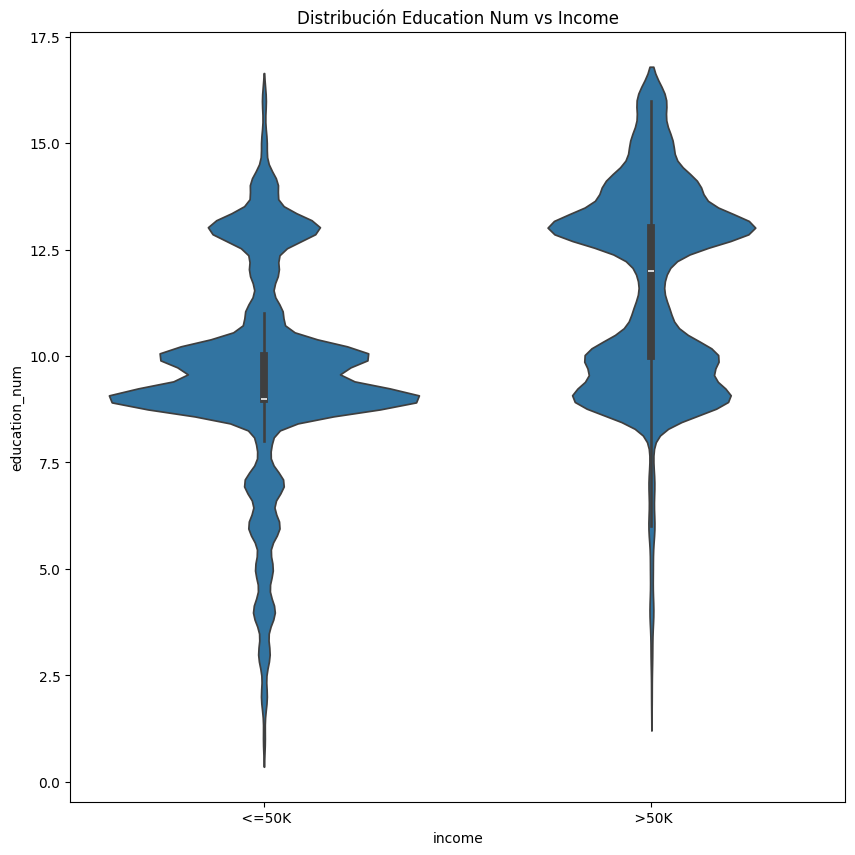

In [30]:
# violin plot education num vs income
plt.figure(figsize=(10, 10))
sns.violinplot(x='income', y='education_num', data=df)
plt.title('Distribución Education Num vs Income')
plt.show()

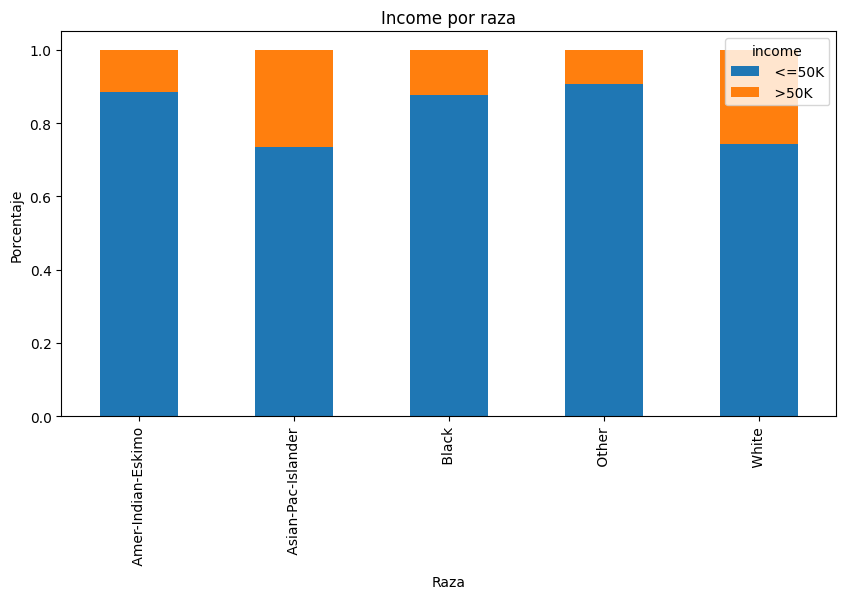

In [19]:
# income por raza porcentajes

df_groupby_race = df.groupby('race')['income'].value_counts(normalize=True).unstack()

# plot
df_groupby_race.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Income por raza')
plt.ylabel('Porcentaje')
plt.xlabel('Raza')
plt.show()


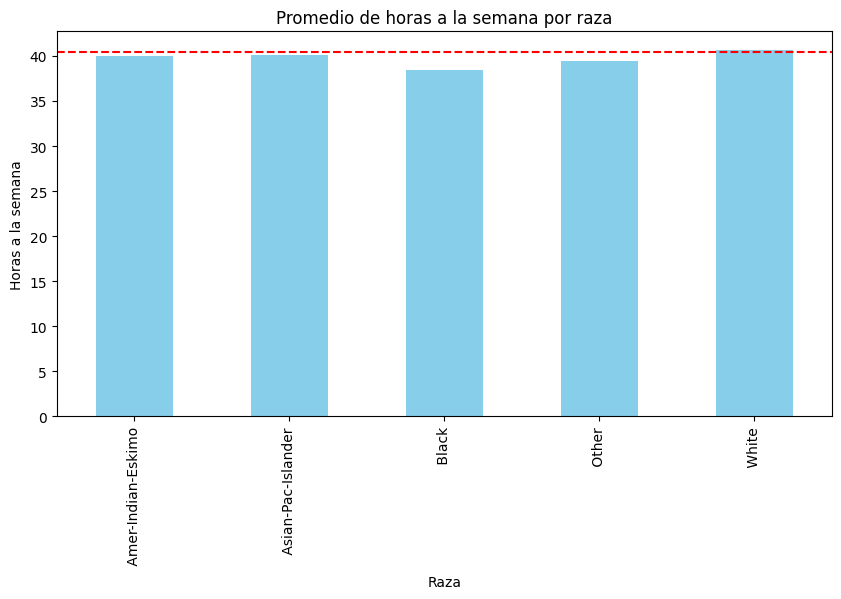

In [45]:
# hours per week per race

# Obtener el promedio de horas por semana por raza
df_groupby_race = df.groupby('race')['hours_per_week'].mean()

# Gráfico de barras
df_groupby_race.plot(kind='bar', figsize=(10, 5), color='skyblue')  # Cambiar color de las barras
# Añadir línea de promedio
plt.axhline(df['hours_per_week'].mean(), color='red', linestyle='--')
plt.title('Promedio de horas a la semana por raza')
plt.ylabel('Horas a la semana')
plt.xlabel('Raza')
plt.show()

### Matrices de correlación

## =======  Codigos anteriores ========

**Agregacion a hours_per_week de <=40 y >40 como la media**

In [ ]:
df_work = df[df['native_country']=='United-States']

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [ ]:
df.groupby(['hours_per_week'])['hours_per_week'].count().sort_values(ascending = False)

hours_per_week
<=40    22980
>40      9581
Name: hours_per_week, dtype: int64

In [ ]:
df.groupby(['race'])['race'].count().sort_values(ascending = False)

NameError: name 'df_id' is not defined

In [ ]:
df_id.groupby(['native_country'])['native_country'].count().sort_values(ascending = False)

native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [ ]:
df_id.groupby(['workclass'])['workclass'].count().sort_values(ascending = False)

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df_id.groupby(['income'])['income'].count().sort_values(ascending = False)

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
df_id['fnlwgt'].min()

12285

In [ ]:
df_id['fnlwgt'].max()

1484705

**REDUCIR CAPITAL_GAIN Y CAPITAL_LOSS A CAPITAL_TOTAL** \
**REDUCIR EDUCATION Y EDUCATION_NUM A EDUCATION???**

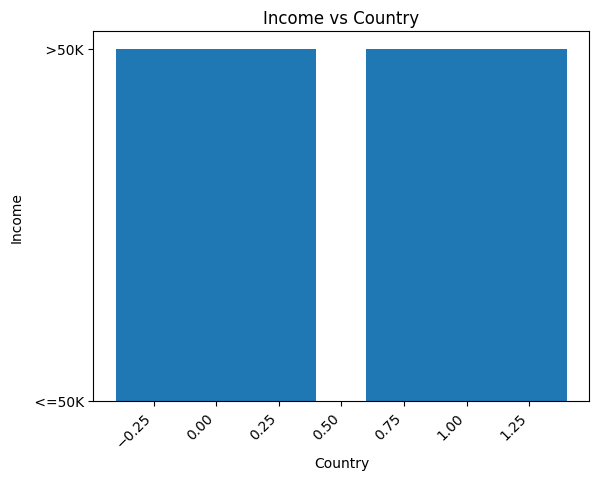

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df_dinero = df[(df[''])]

# Crear un gráfico de barras
plt.bar(df['native_country'], df['income'])

# Establecer etiquetas de los ejes
plt.xlabel('Country')
plt.ylabel('Income')

# Establecer título
plt.title('Income vs Country')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

['<=50K' '>50K']
[0 1]


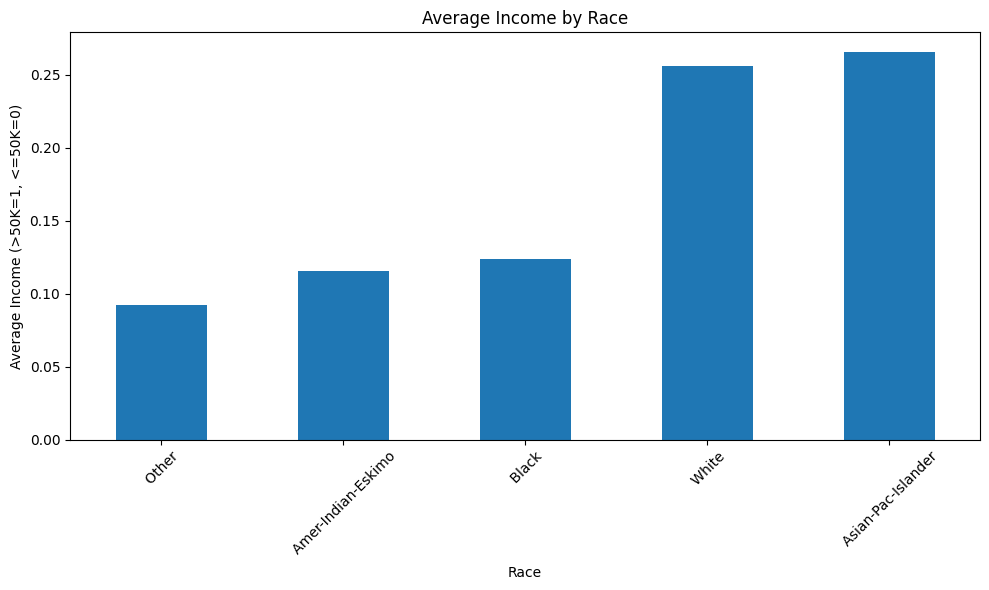

In [ ]:

print(df_combined['income'].unique())
df_combined['income'] = df_combined['income'].str.strip()
df_combined['income_int'] = df_combined['income'].map({'>50K': 1, '<=50K': 0})
print(df_combined['income_int'].unique())
race_income_group = df_combined.groupby('race')['income_int'].mean().sort_values()

plt.figure(figsize=(10, 6))
race_income_group.plot(kind='bar')
plt.title('Average Income by Race')
plt.xlabel('Race')
plt.ylabel('Average Income (>50K=1, <=50K=0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

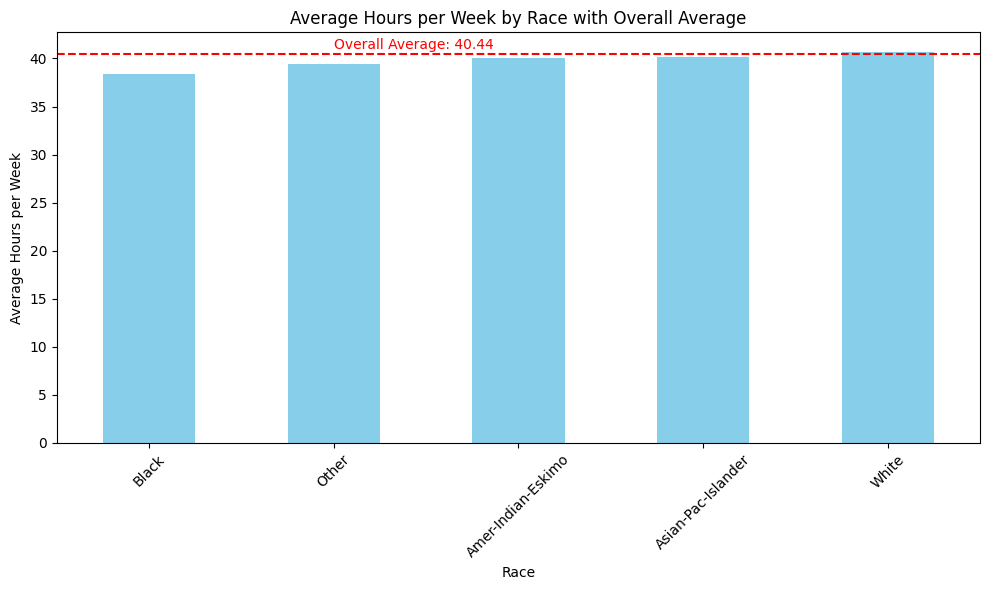

In [ ]:
import matplotlib.pyplot as plt


overall_avg_hours = df_combined.iloc[:, 12].mean()

plt.figure(figsize=(10, 6))
race_hours_group.plot(kind='bar', color='skyblue')
plt.axhline(overall_avg_hours, color='red', linestyle='--')
plt.text(1, overall_avg_hours + 0.5, f'Overall Average: {overall_avg_hours:.2f}', color='red')
plt.title('Average Hours per Week by Race with Overall Average')
plt.xlabel('Race')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df

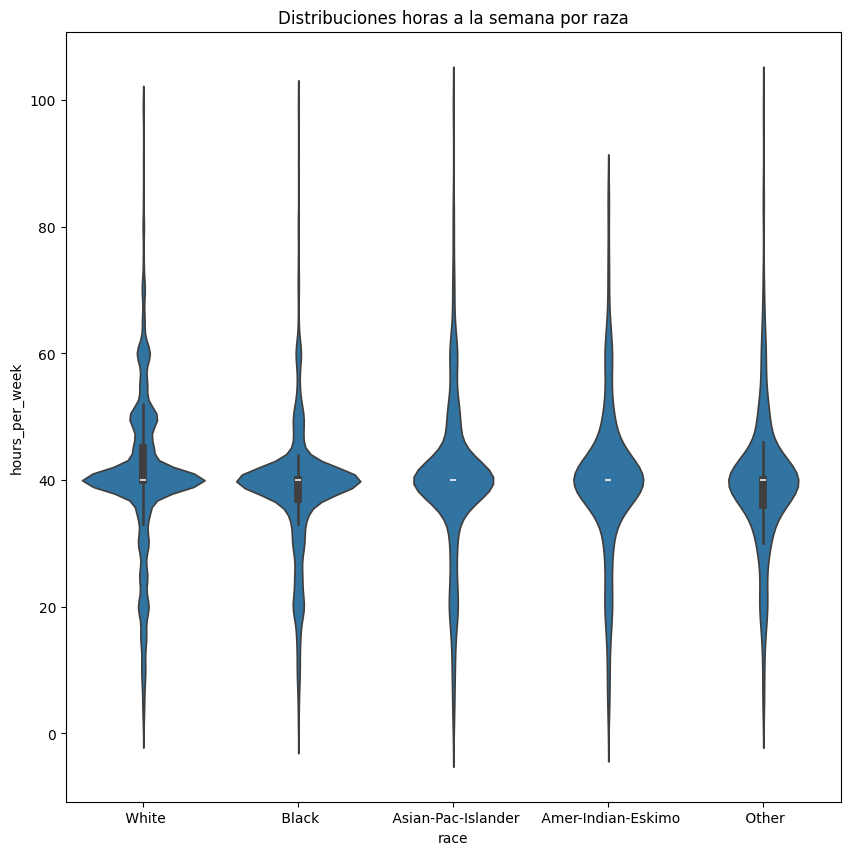

In [ ]:
# hours vs race
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.violinplot(x='race', y='hours_per_week', data=df)
plt.title('Distribuciones horas a la semana por raza')
plt.show()

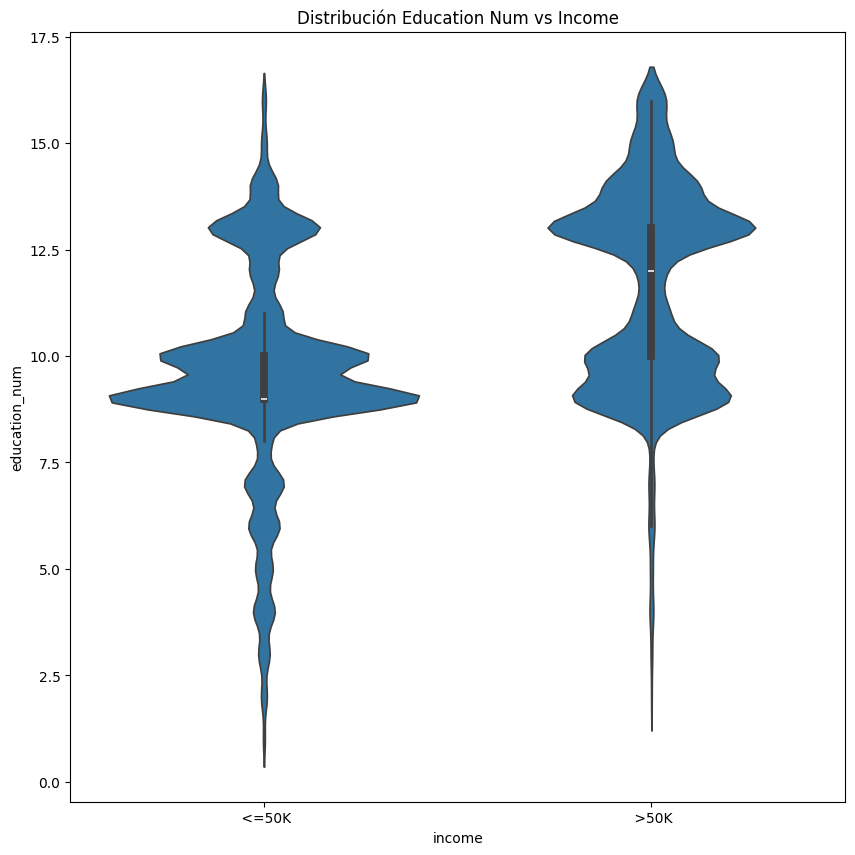

In [ ]:
# violin plot education num vs income
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.violinplot(x='income', y='education_num', data=df)
plt.title('Distribución Education Num vs Income')
plt.show()

Algo
